# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

**Answer**: I would respond, "because there is a 15% chance of getting an elixir, although we can't guarantee this, we should expect to get approximately 15 elixirs if we choose 100 loot boxes at random.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

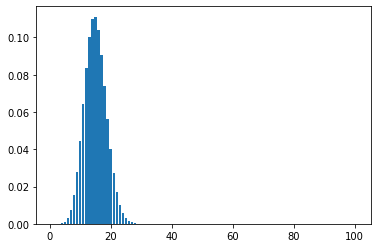

In [3]:
loot_boxes = 100
elix_prob = 0.15
elix_dist = stats.binom(loot_boxes, elix_prob)
picks = range(1,101)
plt.bar(picks, elix_dist.pmf(picks));

In [4]:
# I will assume 'Definately' means 99% probability
elix_dist.cdf(24)

0.9939195914098571

**Answer**: If a person picks 24 loot boxes, they have a 99% chance of choosing an elixer.

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

**Answer:** X is descrete because it is countable. It is a random variable because the loop boxes are being chosen at random.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

**Answer**: Because this is a past/fail experiment, it is a series of Bernoulli trials. A binomial distribution is best suited for X.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [12]:
total = 0
for i in range(21, 101):
    total = total + elix_dist.pmf(i)
total

0.06631976581888226

**Answer:** There is a 6.6% chance that if a user earns 100 loot boxes, they will get more than 20 elixirs.

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [140]:
1 - elix_dist.cdf(20)

0.06631976581888166

**Answer**: There is a 6.6% chance that if a user earns 100 loot boxes, the will get more than 20 elixirs.

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

**Answer**: With a 6.6% chance of getting 20 elixirs from 100 loot boxes, approximately 1 in 20 users will get more than 20 elixers if they earn 100 loot boxes.

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

**Answer**: This is a problem based on a probability and time period. A Poisson distribution is most appropriate for this problem.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [28]:
needed_users = 500_000/2.7
output_string = "Answer: At least " + str(round(needed_users/1000)*1000) + " users are required to generate at least 500,000 a month"
print(output_string)


Answer: At least 185000 users are required to generate at least 500,000 a month


#### 4c. Assume that your platform has the number of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [32]:
n_lootboxes = 2.7 # Number of visitors per hour

lootbox_dist = stats.poisson(n_lootboxes)
low_value_users = 0
high_value_users = 0
# (total_number of users)*(probability of choosing)*(cost per box $1)*(number of boxes purchased)
for i in range(5,101):
    high_value_users = high_value_users + needed_users*(lootbox_dist.pmf(i))*(1)*i 

for i in range(1,5):
    low_value_users = low_value_users + needed_users*(lootbox_dist.pmf(i))*(1)*i 
    

print("Answer:")
output_string = "High Value Users can be expected to produce $" + str(1_000*round(high_value_users/1_000)) + " per month"
print(output_string)
                                               
output_string = "Low Value Users can be expected to produce $" + str(1_000*round(low_value_users/1_000)) + " per month"
print(output_string)

Answer:
High Value Users can be expected to produce $143000.0 per month
Low Value Users can be expected to produce $357000.0 per month


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

In [144]:
print(185_000*lootbox_dist.pmf(1))

print(185_000*(1-lootbox_dist.cdf(5)))

33569.153613505005
10495.358265796223


**Answer**: 

33,000 users purchased only one Loot Box

10,000 users purchased more than five Loot Boxs

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [145]:
empty_list = []
elixir_boxes = ["elixir" for i in range(1, 16)]
empty_boxes = ["empty" for i in range(16, 101)]
loot_boxes = elixir_boxes + empty_boxes
sum = 0

for i in range(1,100_001): # We will run the experiment 100,000 times
    flag = False
    for n in range(1, 101): # We will randomly pick a loot box
        chosen_box = np.random.choice(loot_boxes)
        if ((chosen_box == "elixir") and (flag == False)): # If the loot box contains an elixir, we will record
            empty_list.append(n)                           # how many picks it took and exit the loopq
            flag = True
            break # A break is used here to stop the loop once we've found our first elixir

In [146]:
# As a check, this is the average number of picks required to choose an elixir
for item in empty_list:
    sum = sum + item

average = sum/100000
print(average)

6.69308


In [147]:
# Here we will calculate the percentiles 
percentiles = np.array([5, 25, 50, 75, 95])
percentile_list = np.array(empty_list)
np.percentile(percentile_list, percentiles)

array([ 1.,  2.,  5.,  9., 19.])

**Answer**:

The 5th percentile is choosing 1 Loot Box to obtain a first elixir.

The 25th percentile is choosing 2 Loot Boxes to obtain a first elixir.

The 50th percentile is choosing 5 Loot Boxes to obtain a first elixir.

The 75th percentile is choosing 9 Loot Boxes to obtain a first elixir.

The 95th percentile is choosing 19 Loot Boxes to obtain a first elixir

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

**Answer**: A dictionary would be the best way to store this data. You could use the four differant elixirs as values for a key value pair.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

**Answer**: I think the most important question to answer would be: how many users do you need for Verson 2 to generate an equal amount of revenue as Version 1. If Version 2 require fewer users, then it is the superior Version.